In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from functions_pbp import get_play_by_play, create_home_delta_plot
from nba_api.stats.endpoints import playbyplayv2
import numpy as np

In [2]:
# Load your data (adjust the path to your actual data file)
nba_games_id = pd.read_csv('nba_games_id.csv',  
                            dtype= {'	Unnamed: 0':str, 
                            'GAME_ID':str,
                            'MATCHUP':str})[["GAME_ID","MATCHUP"]]
nba_games_id

,GAME_ID,MATCHUP
0,0022000001,BKN vs. GSW
1,0022000002,LAC @ LAL
2,0022000002,LAL vs. LAC
3,0022000001,GSW @ BKN
4,0022000020,UTA @ POR
...,...,...
4615,0022101217,WAS @ CHA
4616,0022101228,PHI vs. DET
4617,0022101228,DET @ PHI
4618,0022101221,ATL @ HOU


(2884, 2)
(3044, 4)


/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['HomeScore'] = merged_df['HomeScore'].fillna(method='bfill')
/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['AwayScore'] = merged_df['AwayScore'].fillna(method='bfill')


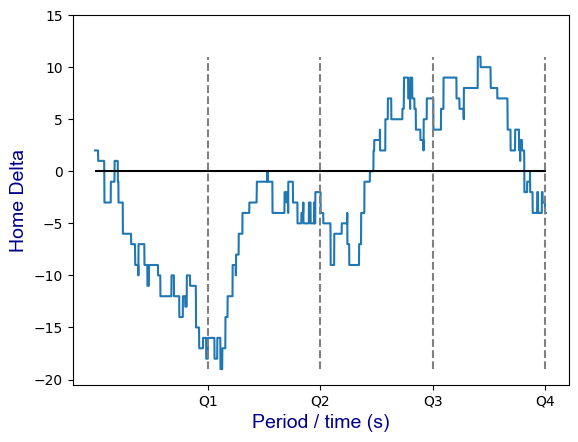

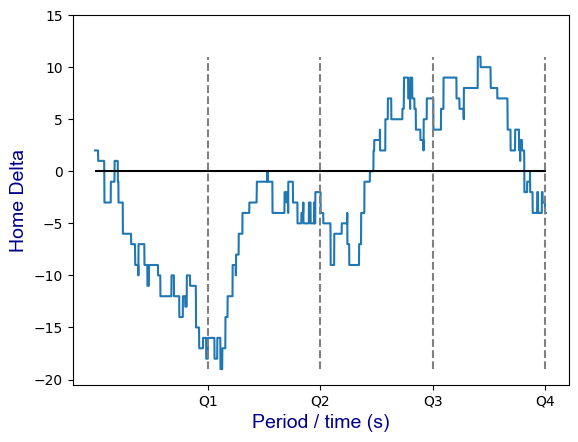

In [3]:
game_id = list((nba_games_id.sample(1)["GAME_ID"]))[0]
df = get_play_by_play(game_id)
create_home_delta_plot(df)

(2884, 2)
(3006, 4)


/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['HomeScore'] = merged_df['HomeScore'].fillna(method='bfill')
/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['AwayScore'] = merged_df['AwayScore'].fillna(method='bfill')


Text(0, 0.5, 'Home Delta')

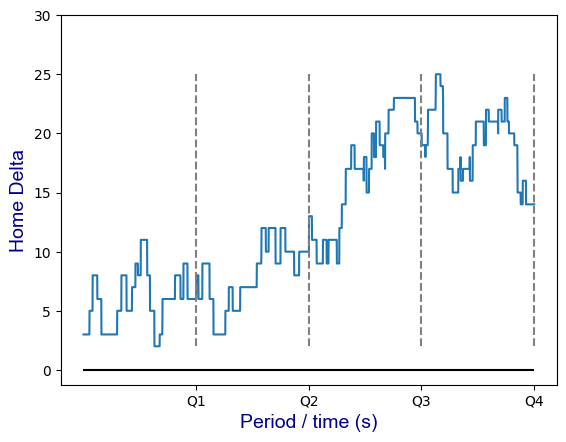

In [4]:
font = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 14,
        }


game_id = list((nba_games_id.sample(1)["GAME_ID"]))[0]
df = get_play_by_play(game_id)
fig, ax = plt.subplots()
ax.plot(df['HomeDelta'])
ax.hlines(y=0,         xmin=0,      xmax=df.shape[0],       colors='black')
for period in range(1,5):
    ax.vlines(x=(60*12*period), 
              ymin=df['HomeDelta'].min(), 
              ymax=df['HomeDelta'].max(), 
              colors='gray',
              ls = '--'
              )
for period in range(5,(df['PERIOD'].max()+1)):
    ax.vlines(x=(60*5*period),
              ymin=df['HomeDelta'].min()//5, 
              ymax=df['HomeDelta'].max(), 
              colors='gray',
              ls = '--'
              )
y_ticks = np.arange(((df['HomeDelta'].min()//5))*5, ((df['HomeDelta'].max()//5)+2)*5, 5)
plt.yticks(y_ticks)

x_labels = [(12*60*1),(12*60*2),(12*60*3),(12*60*4)]
plt.xticks(x_labels,labels=['Q1','Q2','Q3','Q4'])

plt.xlabel('Period / time (s)', fontdict=font)
plt.ylabel('Home Delta', fontdict=font)